In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Road_Accidents.csv')
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [4]:
timefmt = "%d-%m-%Y"
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format= timefmt, errors ='coerce')

In [5]:
df.dtypes

Accident_Index                        object
Accident Date                 datetime64[ns]
Day_of_Week                           object
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Carriageway_Hazards                   object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int64
Time                                  object
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Type                          object
dtype: object

In [6]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [7]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64

In [8]:
df.shape

(307973, 21)

In [9]:
df.drop(columns=['Carriageway_Hazards'], inplace=True)
# out of 307973, 302549 are null, so this column is of no use
# time column have only 17 na values doesn't effect that much

In [10]:
df.isnull().sum()

Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [11]:
df.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,52.487005,-1.368884,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,1.339011,1.356092,0.815857,0.710477,14.032933


In [12]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


# Total Accidents in Each Year

In [13]:
df['Year'] = pd.to_datetime(df['Accident Date'], format=timefmt, errors='coerce').dt.year

In [14]:
df['Month'] = pd.to_datetime(df['Accident Date'], format=timefmt, errors='coerce').dt.month

In [15]:
total_accidents = df.groupby('Year')['Accident Date'].count().sort_values(ascending=False)
total_accidents

Year
2021    163554
2022    144419
Name: Accident Date, dtype: int64

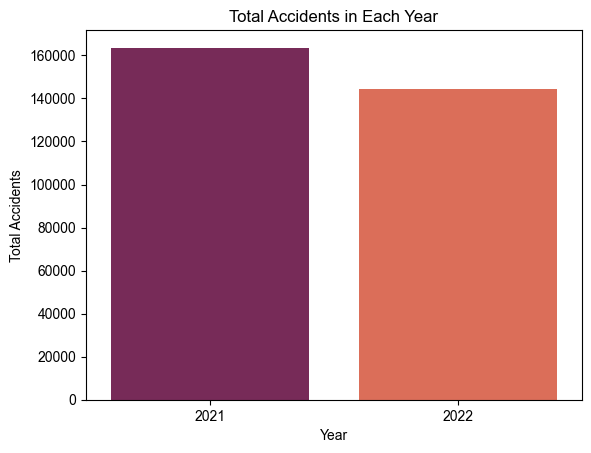

In [16]:
sns.barplot(y=total_accidents.values, x=total_accidents.index, orient='vertical', palette='rocket')
plt.title('Total Accidents in Each Year')  
plt.xlabel('Year')
plt.ylabel('Total Accidents')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Accidents by Day Of Week

In [17]:
total_accidents_day = df.groupby('Year')['Accident Date'].count().sort_values(ascending=False)
total_accidents

Year
2021    163554
2022    144419
Name: Accident Date, dtype: int64

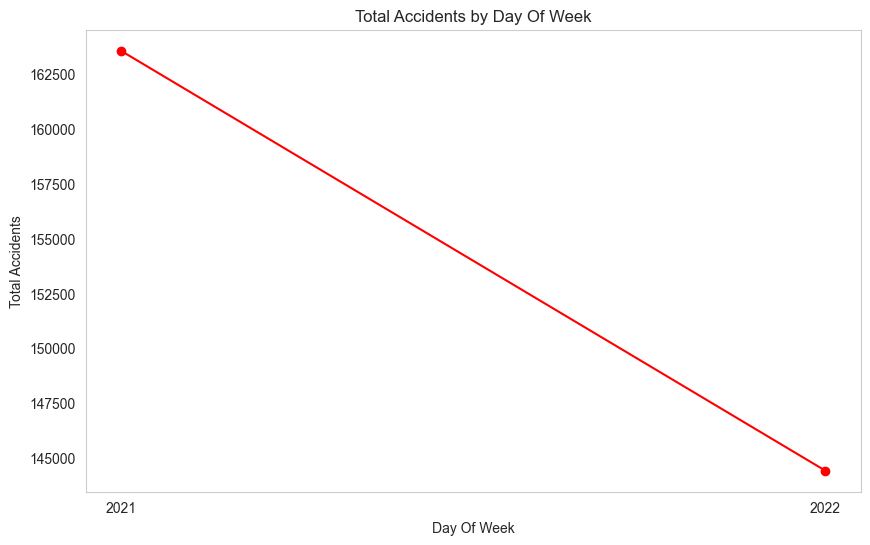

In [18]:
plt.figure(figsize=(10,6))
plt.plot(total_accidents_day.index, total_accidents_day.values, marker='o', color='red')
plt.title('Total Accidents by Day Of Week')  
plt.xlabel('Day Of Week')
plt.ylabel('Total Accidents')
sns.set_style("whitegrid")
plt.grid(False)
plt.xticks(total_accidents_day.index)
plt.show()

# Total Casualties in Each Year

In [19]:
total_casualties = df.groupby('Year')['Number_of_Casualties'].sum().sort_values(ascending=False)
total_casualties

Year
2021    222146
2022    195737
Name: Number_of_Casualties, dtype: int64

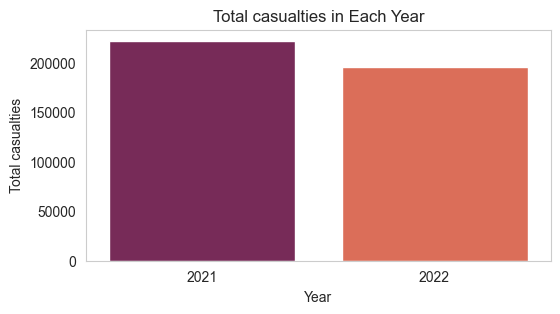

In [20]:
plt.figure(figsize=(6, 3))
sns.barplot(y=total_casualties.values, x=total_casualties.index, orient='vertical', palette='rocket')
plt.title('Total casualties in Each Year')  
plt.xlabel('Year')
plt.ylabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Percentage Change in Casualties from 2021 to 2022

In [21]:
casualties_2021 = total_casualties.loc[2021]
casualties_2022 = total_casualties.loc[2022]
casualties_2021, casualties_2022

(222146, 195737)

In [22]:
percentage_change = ((casualties_2022 - casualties_2021) / casualties_2021) * 100
percentage_change

-11.888127627776328

# Casualties for each month of Each Year

In [23]:
total_casualties_month_year = total_casualties_by_month = df.groupby(['Year', 'Month'])['Number_of_Casualties'].sum()
total_casualties_month_year 

Year  Month
2021  1        18173
      2        14648
      3        17815
      4        17335
      5        18852
      6        18728
      7        19682
      8        18797
      9        18456
      10       20109
      11       20975
      12       18576
2022  1        13163
      2        14804
      3        16575
      4        15767
      5        16775
      6        17230
      7        17201
      8        16796
      9        17500
      10       18287
      11       18439
      12       13200
Name: Number_of_Casualties, dtype: int64

# Total Accidents & Casualties by Severity

In [24]:
severity = df.groupby(['Accident_Severity'])['Number_of_Casualties'].sum()
severity

Accident_Severity
Fatal        7135
Serious     59312
Slight     351436
Name: Number_of_Casualties, dtype: int64

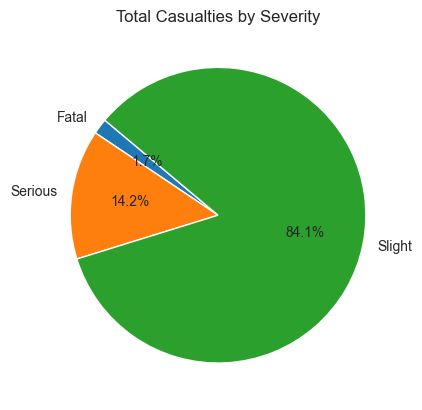

In [25]:
plt.pie(severity, labels=severity.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Casualties by Severity')
plt.show()

# Total Accidents & Casualties by Road Type

In [26]:
road_type = df.groupby(['Road_Type'])['Number_of_Casualties'].sum().sort_values(ascending=False)
road_type

Road_Type
Single carriageway    309698
Dual carriageway       67368
Roundabout             26828
One way street          7389
Slip road               6600
Name: Number_of_Casualties, dtype: int64

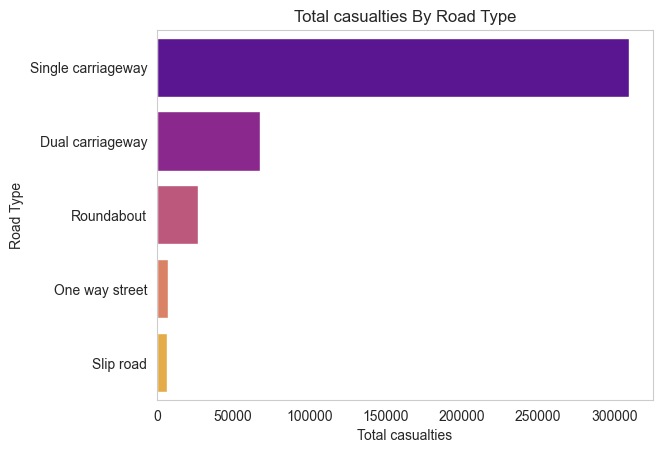

In [27]:
sns.barplot(x=road_type.values, y=road_type.index, orient='horizontal', palette='plasma')
plt.title('Total casualties By Road Type')  
plt.ylabel('Road Type')
plt.xlabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Casualties by Light Conditions

In [28]:
light_conditions = df.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()
light_conditions

Light_Conditions
Darkness - lighting unknown      3829
Darkness - lights lit           82167
Darkness - lights unlit          1538
Darkness - no lighting          25386
Daylight                       304963
Name: Number_of_Casualties, dtype: int64

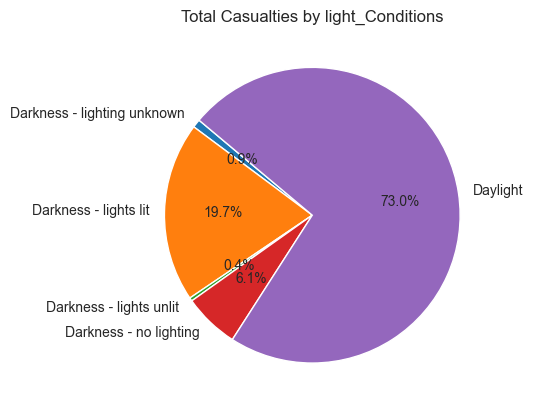

In [29]:
plt.pie(light_conditions, labels=light_conditions.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Casualties by light_Conditions')
plt.show()

# Total Casualties by road surface condition

In [30]:
Road_Surface_Conditions = df.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].sum().sort_values(ascending=False)
Road_Surface_Conditions

Road_Surface_Conditions
Dry                     279445
Wet or damp             115093
Frost or ice             16306
Snow                      6475
Flood over 3cm. deep       564
Name: Number_of_Casualties, dtype: int64

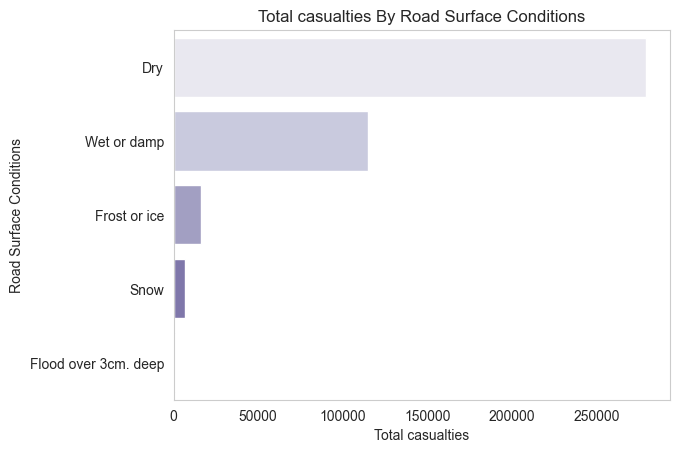

In [31]:
sns.barplot(x=Road_Surface_Conditions.values, y=Road_Surface_Conditions.index, orient='horizontal', palette='Purples')
plt.title('Total casualties By Road Surface Conditions')  
plt.ylabel('Road Surface Conditions')
plt.xlabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Casualties by area

In [32]:
area = df.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum()
area

Urban_or_Rural_Area
Rural    162019
Urban    255864
Name: Number_of_Casualties, dtype: int64

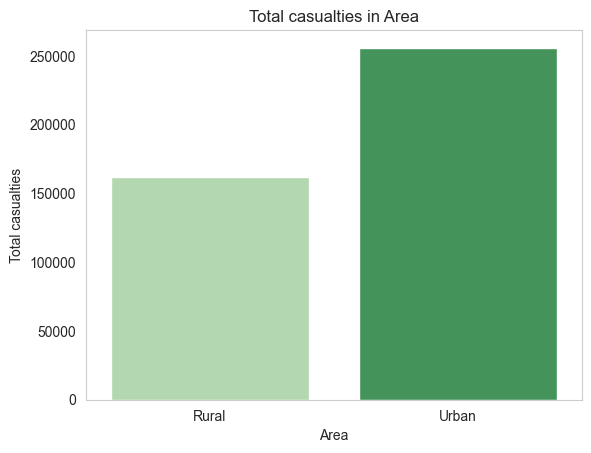

In [33]:
sns.barplot(y=area.values, x=area.index, orient='vertical', palette='Greens')
plt.title('Total casualties in Area')  
plt.xlabel('Area')
plt.ylabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Casualties by weather condition

In [34]:
weather_conditions = df.groupby(['Weather_Conditions'])['Number_of_Casualties'].sum().sort_values(ascending=False)
weather_conditions

Weather_Conditions
Fine no high winds       330311
Raining no high winds     52794
Other                     11965
Snowing no high winds      6486
Fog or mist                6289
Raining + high winds       4936
Fine + high winds          4339
Snowing + high winds        763
Name: Number_of_Casualties, dtype: int64

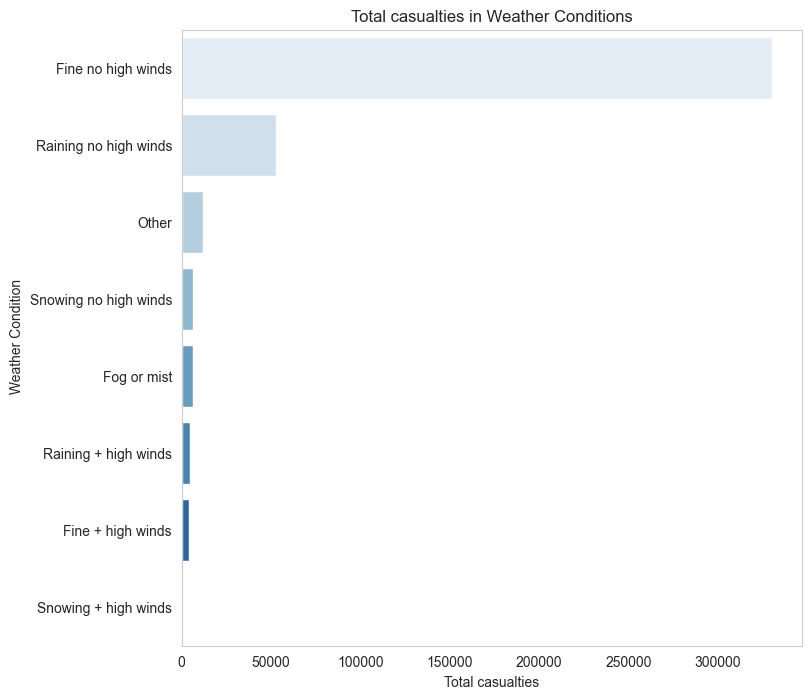

In [35]:
plt.figure(figsize=(8, 8))
sns.barplot(x=weather_conditions.values, y=weather_conditions.index, orient='horizontal', palette='Blues')
plt.title('Total casualties in Weather Conditions')  
plt.ylabel(' Weather Condition')
plt.xlabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Casualties By Vehicle Type

In [36]:
vehicle_type = df.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum().sort_values(ascending=False)
vehicle_type

Vehicle_Type
Car                                      325922
Van / Goods 3.5 tonnes mgw or under       21298
Motorcycle over 500cc                     15151
Bus or coach (17 or more pass seats)      11710
Motorcycle 125cc and under                 9109
Goods 7.5 tonnes mgw and over              8770
Taxi/Private hire car                      7563
Motorcycle 50cc and under                  4945
Motorcycle over 125cc and up to 500cc      4467
Goods over 3.5t. and under 7.5t            3404
Other vehicle                              3329
Minibus (8 - 16 passenger seats)           1088
Agricultural vehicle                       1032
Pedal cycle                                  92
Ridden horse                                  3
Name: Number_of_Casualties, dtype: int64

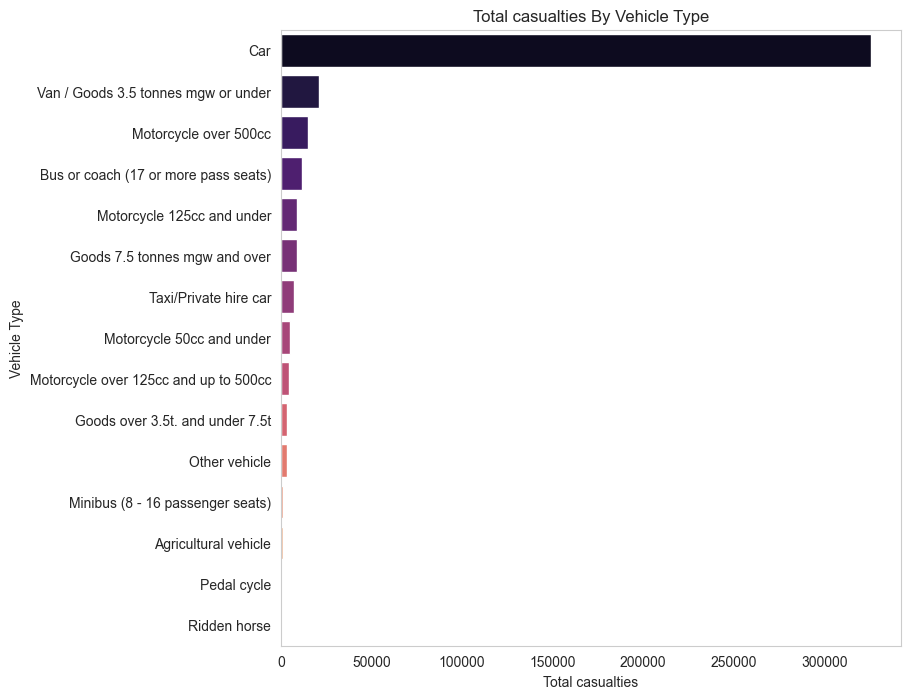

In [37]:
plt.figure(figsize=(8, 8))
sns.barplot(x=vehicle_type.values, y=vehicle_type.index, orient='horizontal', palette='magma')
plt.title('Total casualties By Vehicle Type')  
plt.ylabel('Vehicle Type')
plt.xlabel('Total casualties')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Average Speed Limit By Vehicle Type

In [38]:
vehicle_type_avg_speed = df.groupby(['Vehicle_Type'])['Speed_limit'].mean().sort_values(ascending=False)
vehicle_type_avg_speed

Vehicle_Type
Pedal cycle                              41.212121
Agricultural vehicle                     39.412550
Motorcycle over 125cc and up to 500cc    39.266362
Goods over 3.5t. and under 7.5t          39.240608
Van / Goods 3.5 tonnes mgw or under      39.063715
Goods 7.5 tonnes mgw and over            39.026332
Car                                      38.903413
Other vehicle                            38.751987
Taxi/Private hire car                    38.713693
Bus or coach (17 or more pass seats)     38.627677
Minibus (8 - 16 passenger seats)         38.611449
Motorcycle 50cc and under                38.587632
Motorcycle over 500cc                    38.353821
Motorcycle 125cc and under               38.032691
Ridden horse                             30.000000
Name: Speed_limit, dtype: float64

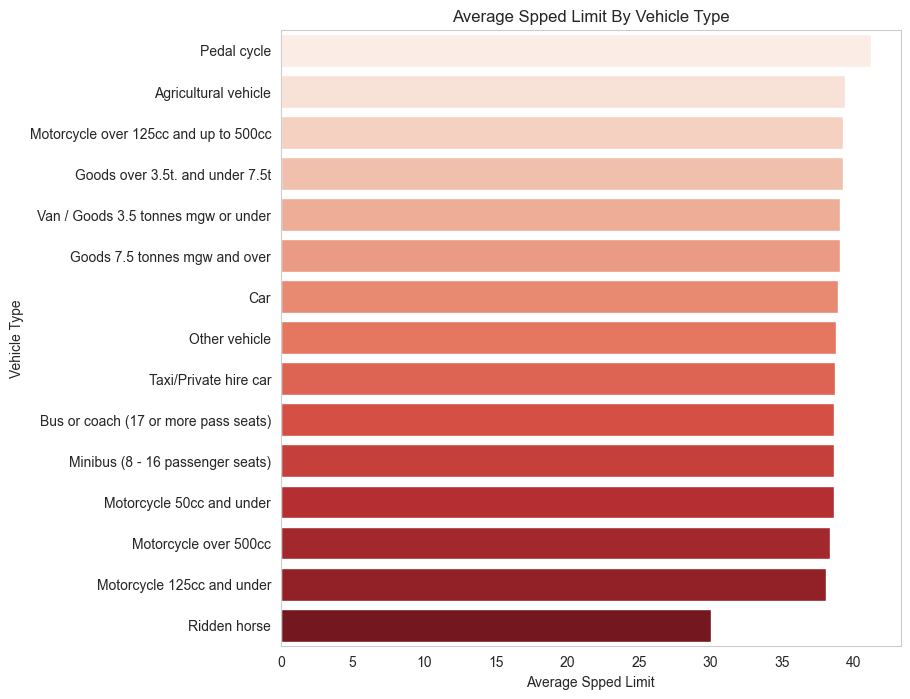

In [39]:
plt.figure(figsize=(8, 8))
sns.barplot(x=vehicle_type_avg_speed.values, y=vehicle_type_avg_speed.index, orient='horizontal', palette='Reds')
plt.title('Average Spped Limit By Vehicle Type')  
plt.ylabel('Vehicle Type')
plt.xlabel('Average Spped Limit')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Casualties By District

In [40]:
df.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].sum()

Local_Authority_(District)
Aberdeen City     499
Aberdeenshire     906
Adur              369
Allerdale         788
Alnwick            31
                 ... 
Wychavon          888
Wycombe          1121
Wyre              812
Wyre Forest       730
York             1176
Name: Number_of_Casualties, Length: 422, dtype: int64

In [41]:
District = df.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].sum().sort_values(ascending=False).head(10)
District

Local_Authority_(District)
Birmingham       8611
Leeds            5821
Bradford         4431
Manchester       4366
Liverpool        4052
Cornwall         3820
Sheffield        3737
Kirklees         3312
County Durham    3295
Westminster      3169
Name: Number_of_Casualties, dtype: int64

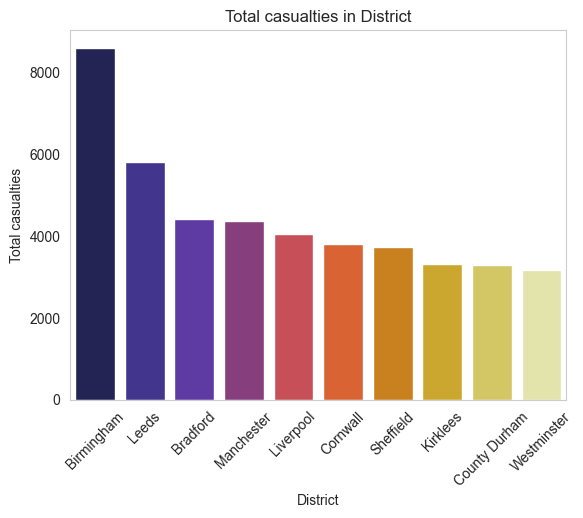

In [42]:
sns.barplot(y=District.values, x=District.index, orient='vertical', palette='CMRmap')
plt.title('Total casualties in District')  
plt.xlabel('District')
plt.ylabel('Total casualties')
sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()